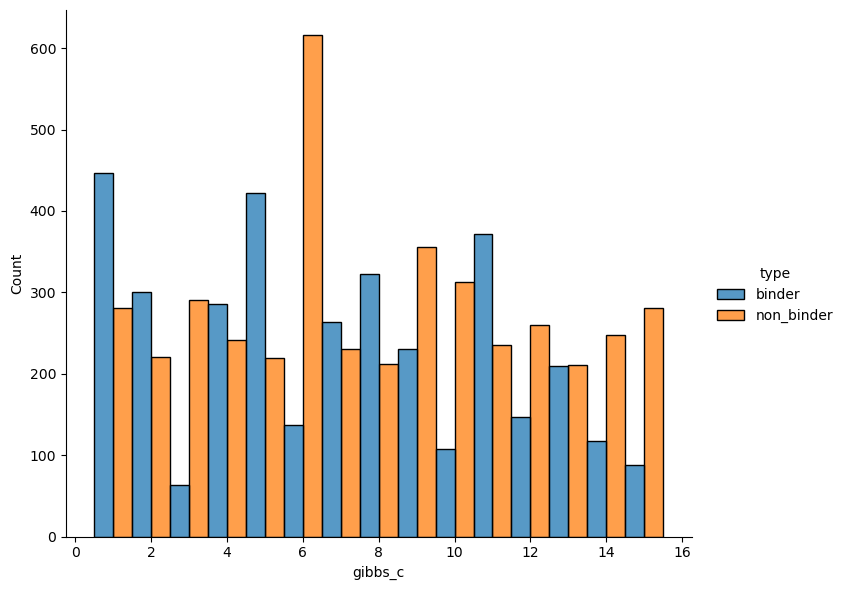

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
cluster_path ="/home/daqop/Desktop/3D-vac-project/GibbsCluster/ServerOutput/hla0201_9mers_notrash/cores" 
csv_path = "../../data/external/processed/hla0201_9mers.csv"
df = pd.read_csv(csv_path)
cluster_group = 15
df["gibbs_c"] = cluster_group+1
clusters = []
# add a column `type` containing binding or not:
df.loc[df["measurement_value"] < 500.0,"type"] = "binder"
df.loc[df["measurement_value"] >= 500.0, "type"] = "non_binder"
# iterate through all core files containing peptides:
for i in range(1, cluster_group+1):
    clusters.append(i)
    with open(f"{cluster_path}/gibbs.{i}of{cluster_group}.core") as f:
        peptides = [l.replace("\n", "") for l in f]
        for p in peptides:
            # for each peptides in the core file, update the gibbs_cluster in the df:
            df.loc[df["peptide"] == p, "gibbs_c"] = i
        # print(f"For cluster {i}:\n Number of binders: {pos} \n Number of negatives: {neg}")

#plot:
sns.displot(data=df, x="gibbs_c", hue="type", multiple="dodge", discrete=True, height=6, aspect=1.2)

